In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

Defining train and test

In [51]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [52]:
train.columns

Index(['x', 'y'], dtype='object')

In [53]:
train.sample()

,x,y
473,71.0,67.920513


In [54]:
test.sample()

,x,y
69,13,17.076111


In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


Removing null values

In [57]:
imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer.fit(train)
train = pd.DataFrame(imputer.transform(train),columns=('x','y'))

In [58]:
X_train = train.iloc[:,0:1].values
y_train = train.iloc[:,-1].values
X_test = test.iloc[:,0:1].values
y_test = test.iloc[:,-1].values

Generate regressor and fit the data

In [59]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

Plotting the training data

<AxesSubplot: xlabel='x', ylabel='y'>

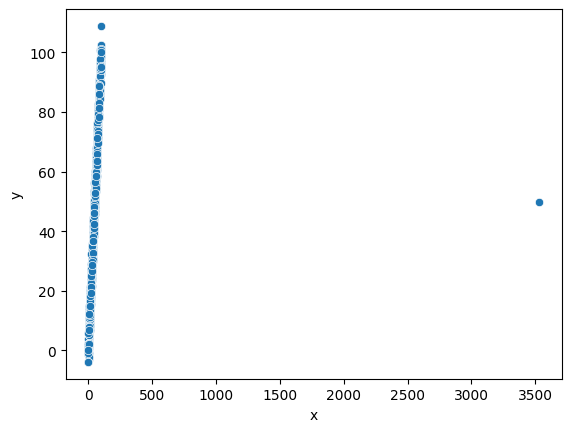

In [60]:
sns.scatterplot(x=train["x"], y=train["y"])

Plotting the testing data

<AxesSubplot: xlabel='x', ylabel='y'>

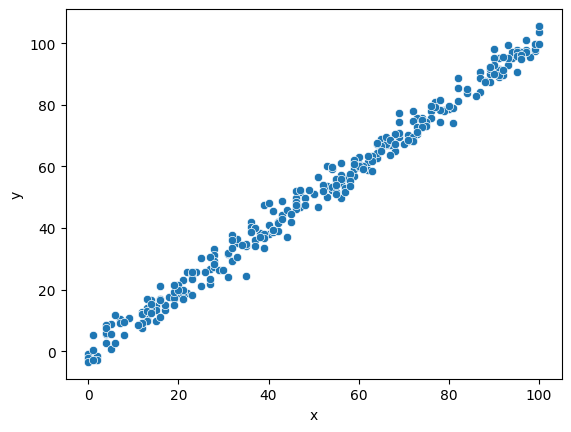

In [61]:
sns.scatterplot(x=test["x"], y=test["y"])

In [62]:
train.describe() #we can see which are the maximum values in train data 

,x,y
count,700.000000,700.000000
mean,54.985939,49.939869
std,134.681703,29.088388
min,0.000000,-3.839981
25%,25.000000,24.985830
50%,49.000000,49.095828
75%,75.000000,74.880631
max,3530.157369,108.871618


In [63]:
test.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


In [64]:
train["x"].idxmax()

213

Doing this, you will get some unexpected graphics!
Because there is a value too high and must be deleted

In [65]:
# Hint: Run a loop to find the index of max vlaue
# now we have to delete max value in train dataset and test dataset from every column 
#------------------------Max value in train dataset 
#------------columns "x"
print("train dataset :-")
#index
train_index_col_x = train["x"].idxmax()
print("This is index of Max value of train_dataset in column 'X':-", train_index_col_x)
#max_value
max_value_col_x = train["x"].loc[train_index_col_x]
print("This is max value of train_dataset in column 'x':-",max_value_col_x)
#-------------columns "y"
#index
train_index_col_y = train["y"].idxmax()
print("This is index of Max value of train_dataset in column 'y':-", train_index_col_y)
#max_value
max_value_col_y = train["y"].loc[train_index_col_y]
print("This is max value of train_dataset in column 'y':-",max_value_col_y)

print(" ")
print("test dataset :-")
#----------------------------Max value in test dataset 

#------------columns "x"
#index
test_index_col_x = test["x"].idxmax()
print("This is index of Max value of test_dataset in column 'X':-", train_index_col_x)
#max_value
max_value_col_x = test["x"].loc[test_index_col_x]
print("This is max value of test_dataset in column 'x':-",max_value_col_x)
#-------------columns "y"
#index
test_index_col_y = test["y"].idxmax()
print("This is index of Max value of test_dataset in column 'y':-", test_index_col_y)
#max_value
max_value_col_y = test["y"].loc[test_index_col_y]
print("This is max value of test_dataset in column 'y':-",max_value_col_y)

train dataset :-
This is index of Max value of train_dataset in column 'X':- 213
This is max value of train_dataset in column 'x':- 3530.15736917
This is index of Max value of train_dataset in column 'y':- 632
This is max value of train_dataset in column 'y':- 108.8716183
 
test dataset :-
This is index of Max value of test_dataset in column 'X':- 213
This is max value of test_dataset in column 'x':- 100
This is index of Max value of test_dataset in column 'y':- 87
This is max value of test_dataset in column 'y':- 105.5918375


Now we should delete the index of max value to make data more fit

In [66]:
train.drop(train_index_col_x,axis=0,inplace=True)
train.drop(train_index_col_y,axis=0,inplace=True)# fill the index
X_train = train.iloc[:,0:1].values
y_train = train.iloc[:,-1].values
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

Again,Plotting the training data

<AxesSubplot: xlabel='x', ylabel='y'>

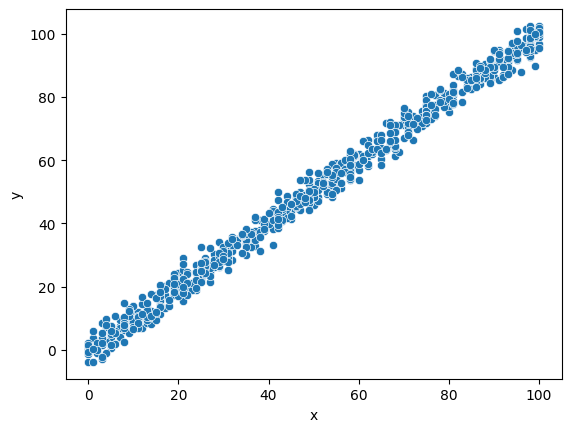

In [67]:
sns.scatterplot(x=train["x"], y=train["y"])

Again,Plotting the testing data

<AxesSubplot: xlabel='x', ylabel='y'>

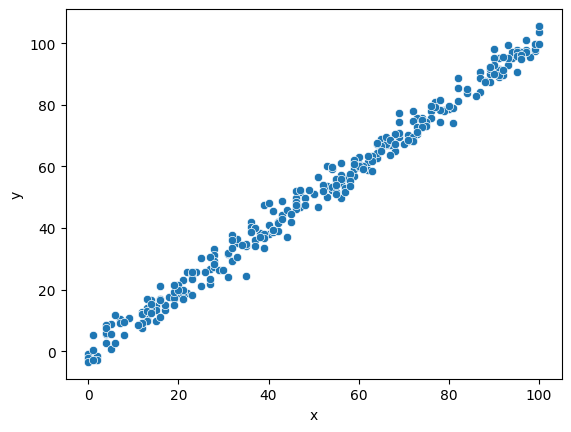

In [49]:
sns.scatterplot(x=test["x"], y=test["y"])